In [ ]:
from rembg import remove
import PIL
from PIL import Image
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_palette(sns.color_palette("dark", n_colors=10), n_colors=10)
palette = sns.color_palette()
matplotlib.rcParams.update({'font.size': 15})
cmap = 'crest_r'

In [2]:
def plot_image(img, fig, x_pos=0, y_pos=0, dim=256, remove_bg=False):
    if remove_bg:
        img = remove(img)

    maxsize = (dim, dim)
    img.thumbnail(maxsize)
    
    fig.figimage(img, x_pos, y_pos)


def plot_gradient(ax, cmap="coolwarm_r"):
    gradient = np.linspace(0, 1, 512).reshape(1, -1)
    ax.matshow(gradient, aspect='auto', cmap=cmap, vmin=-0.1, vmax=1.1, alpha=0.9)


def add_text_to_plot(ax, text, x_pos, y_pos, fontsize=15):
    ax.text(x_pos, y_pos, text, fontsize=fontsize, ha='center', va='center', transform=ax.transAxes)

def add_arrow(fig, x_start, y_start, x_end, y_end, color='black'):
    fig.annotate('', xy=(x_end, y_end), xytext=(x_start, y_start), arrowprops=dict(arrowstyle="->", color=color, lw=2))

def plot_double_well(ax, x_pos, y_pos, x_min, x_max, y_min, y_max, scale, color='black', lw=4):

    # double well function
    fn = lambda x, x_pos, y_pos: scale*(8*((x-x_pos)**2-1)**2 + 0.5*(x-x_pos) + y_pos)
    x = np.linspace(x_min, x_max, 100)

    # confine to max width and height in plot
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])

    ax.plot(x, fn(x, x_pos, y_pos), color=color, linewidth=lw)


2400.0 1200.0


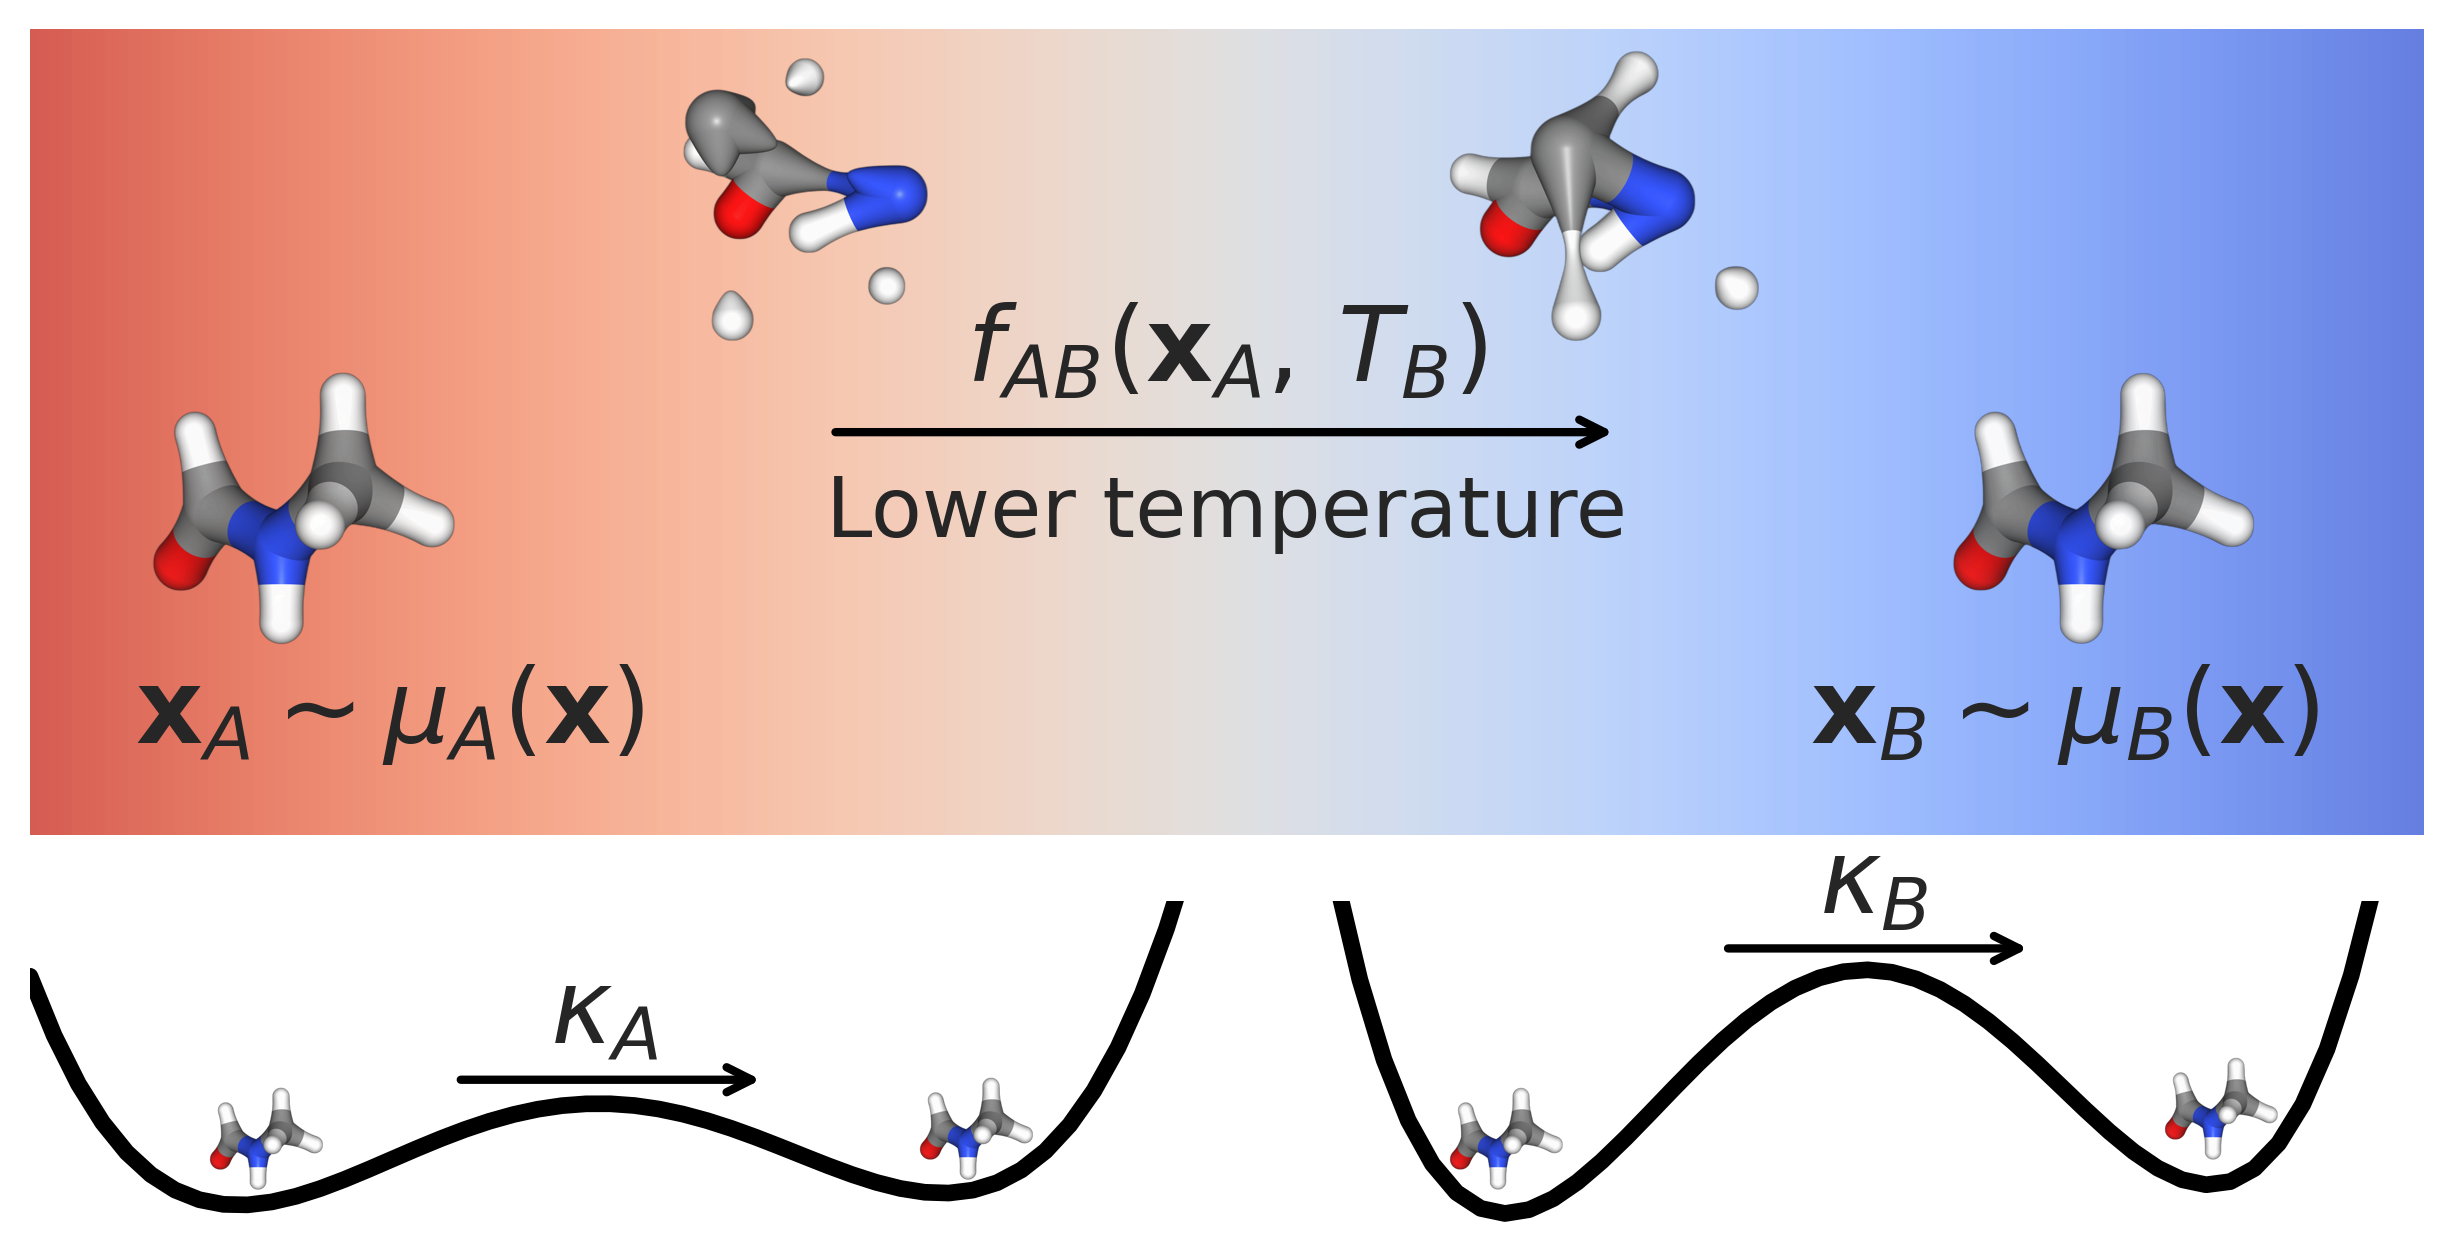

In [ ]:
interm_frames_path = "mdqm9/plots/framesrkspace/Chalmers/Thesis/thermointerpolants/paper/mdqm9/analyze/img/frames" 
frames = [Image.open(f"{interm_frames_path}/{f}") for f in ["frame2_remb.png", "frame4_remb.png", "frame6_remb.png", "frame5_remb.png"]]

fig, axs = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [2.5, 1]}, dpi=300)
for ax in axs:
    ax.axis('off')

max_width = fig.bbox.xmax
max_height = fig.bbox.ymax
print(max_width, max_height)

# first row
plot_gradient(axs[0])

dim = 400
plot_image(img=frames[0], fig=fig, x_pos=100, y_pos=600, dim=dim, remove_bg=True)
plot_image(img=frames[1], fig=fig, x_pos=600, y_pos=900, dim=dim, remove_bg=True)
plot_image(img=frames[2], fig=fig, x_pos=1400, y_pos=900, dim=dim, remove_bg=True)
plot_image(img=frames[3], fig=fig, x_pos=1900, y_pos=600, dim=dim, remove_bg=True)

add_text_to_plot(axs[0], r"$\mathbf{x}_A\sim  \mu_A\left(\mathbf{x}\right)$", x_pos=0.15, y_pos=0.15, fontsize=25)
add_text_to_plot(axs[0], r"$\mathbf{x}_B\sim \mu_B\left(\mathbf{x}\right)$", x_pos=0.85, y_pos=0.15, fontsize=25)

add_arrow(axs[0], x_start=170, y_start=0, x_end=340, y_end=0)
add_text_to_plot(axs[0], r"$f_{AB}\left(\mathbf{x}_A,\,T_B\right)$", x_pos=0.5, y_pos=0.6, fontsize=25)
add_text_to_plot(axs[0], r"Lower temperature", x_pos=0.5, y_pos=0.4, fontsize=20)


# second row
plot_double_well(axs[1], x_pos=-1.8, y_pos=0., x_min=-3.4, x_max=3.4, y_min=-2, y_max=25, scale=1.0, color='k', lw=4)
plot_double_well(axs[1], x_pos=1.8, y_pos=0., x_min=-3.4, x_max=3.4, y_min=-2, y_max=25, scale=2.4, color='k', lw=4)

plot_image(img=frames[0], fig=fig, x_pos=190, y_pos=60, dim=150, remove_bg=True)
plot_image(img=frames[0], fig=fig, x_pos=900, y_pos=70, dim=150, remove_bg=True)
add_text_to_plot(axs[1], r"$\kappa_A$", x_pos=0.24, y_pos=0.65, fontsize=25)
add_arrow(axs[1], x_start=-2.2, y_start=10, x_end=-1.3, y_end=10)

plot_image(img=frames[3], fig=fig, x_pos=1430, y_pos=60, dim=150, remove_bg=True)
plot_image(img=frames[3], fig=fig, x_pos=2145, y_pos=90, dim=150, remove_bg=True)
add_arrow(axs[1], x_start=1.4, y_start=21, x_end=2.3, y_end=21)
add_text_to_plot(axs[1], r"$\kappa_B$", x_pos=0.77, y_pos=1.05, fontsize=25)

plt.tight_layout(pad=0.05)
plt.savefig(bbox_inches='tight')